# Corrida espacial

#### Importando as bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines

#### Importando os dados

In [2]:
#Importando os dados
df = pd.read_csv('/home/daniel/Downloads/Dados/Space+Missions+(start)/mission_launches.csv')

#### Explorando os dados

In [3]:
#visão geral do df
df.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [4]:
#dropando as colunas '_c0' e 'Unnamed: 0'
df = df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis = 1 )

In [5]:
#vendo a quantidade de numeros nulos
df.isnull().sum()

Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64

In [6]:
#verificando a distribuição do df
df.shape

(4324, 7)

In [7]:
#Substituindo o valor dos NaNs
df = df.fillna('NaN')

In [8]:
#criando um loop para mostrar uma lista com os números em string com uma len > 5 (não é possível converter tais números para float)
for i in df['Price']:
    num = len(i)
    if num > 5:
        print(df.index[df['Price'] == i].tolist())
    else:
        continue

[1916, 2000]
[1916, 2000]
[3149, 3180, 3243, 3328, 3384, 3475, 3511, 3545, 3560, 3584, 3603, 3683, 3716]
[3149, 3180, 3243, 3328, 3384, 3475, 3511, 3545, 3560, 3584, 3603, 3683, 3716]
[3149, 3180, 3243, 3328, 3384, 3475, 3511, 3545, 3560, 3584, 3603, 3683, 3716]
[3149, 3180, 3243, 3328, 3384, 3475, 3511, 3545, 3560, 3584, 3603, 3683, 3716]
[3149, 3180, 3243, 3328, 3384, 3475, 3511, 3545, 3560, 3584, 3603, 3683, 3716]
[3149, 3180, 3243, 3328, 3384, 3475, 3511, 3545, 3560, 3584, 3603, 3683, 3716]
[3149, 3180, 3243, 3328, 3384, 3475, 3511, 3545, 3560, 3584, 3603, 3683, 3716]
[3149, 3180, 3243, 3328, 3384, 3475, 3511, 3545, 3560, 3584, 3603, 3683, 3716]
[3149, 3180, 3243, 3328, 3384, 3475, 3511, 3545, 3560, 3584, 3603, 3683, 3716]
[3149, 3180, 3243, 3328, 3384, 3475, 3511, 3545, 3560, 3584, 3603, 3683, 3716]
[3149, 3180, 3243, 3328, 3384, 3475, 3511, 3545, 3560, 3584, 3603, 3683, 3716]
[3149, 3180, 3243, 3328, 3384, 3475, 3511, 3545, 3560, 3584, 3603, 3683, 3716]
[3149, 3180, 3243, 3328, 3

In [9]:
#dropando as linhas com os números buscados anteriormente
df.drop(labels=[1916, 2000, 3149, 3180, 3243, 3328, 3384, 3475, 3511, 3545, 3560, 3584, 3603, 3683, 3716], axis = 0, inplace = True)

In [10]:
#convertendo a coluna 'Price' para float
df['Price'] = df['Price'].astype('float')

In [11]:
#transformando a coluna 'Data' para o formato Datetime
df['Date'] = pd.to_datetime(df['Date'], errors = 'coerce', utc = True)

In [12]:
#criando um segundo dataset, agrupando por organização
df2 = df.groupby('Organisation').sum()

In [13]:
#resetando os indexes
df2.reset_index(inplace=True)

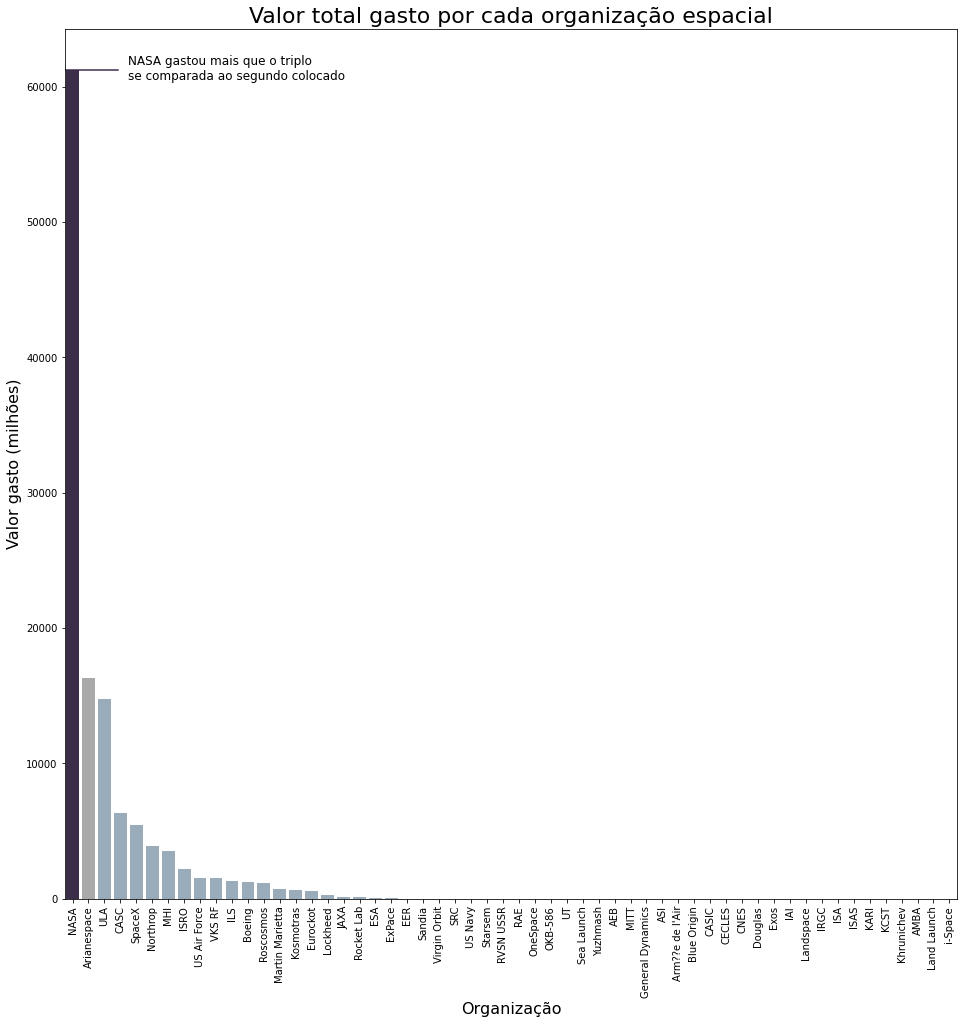

In [14]:
#plotando um gráfico
plt.figure(figsize=(16,16))
sns.barplot(x = 'Organisation', y = 'Price', data = df2, color = '#95adbe', order = df2.sort_values('Price', ascending = False).Organisation)
sns.barplot(x = 'Organisation', y = 'Price', data = df2[df2['Organisation'] == 'NASA'], color='#3c2a4d', order = df2.sort_values('Price', ascending = False).Organisation)
sns.barplot(x = 'Organisation', y = 'Price', data = df2[df2['Organisation'] == 'Arianespace'], color='#a9a9a9', order = df2.sort_values('Price', ascending = False).Organisation)
plt.xticks(rotation = 90)
plt.xlabel('Organização', fontsize = 16)
plt.ylabel('Valor gasto (milhões)', fontsize = 16)
plt.title('Valor total gasto por cada organização espacial', fontsize = 22)
plt.text(3.5, 60500, 'NASA gastou mais que o triplo \nse comparada ao segundo colocado', fontsize = 12)
plt.axhline(y = 61200, xmin = 0, xmax = 0.06, color='#3c2a4d')

Text(15, 8200, 'Roscosmos e RVSN USSR, principais \nprogramas espaciais russo \ne soviético respectivamente')

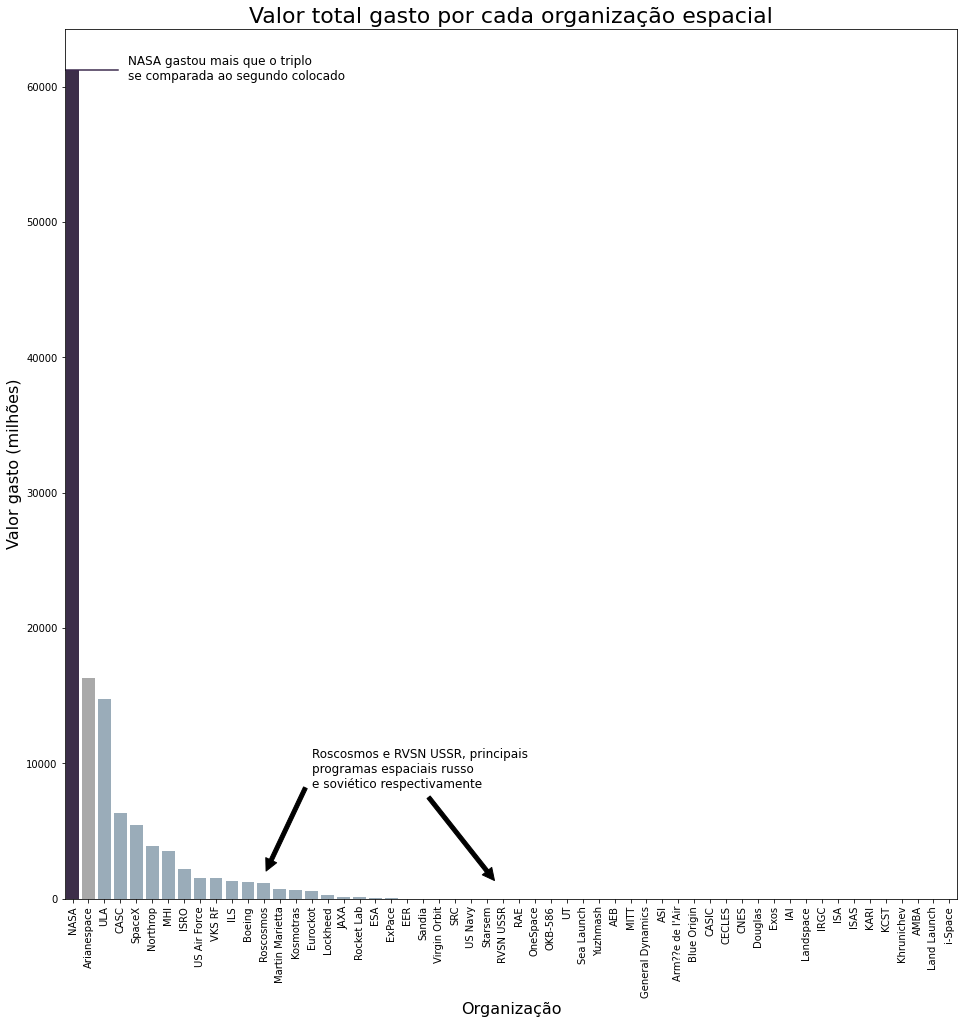

In [15]:
#plotando um gráfico
plt.figure(figsize=(16,16))
sns.barplot(x = 'Organisation', y = 'Price', data = df2, color = '#95adbe', order = df2.sort_values('Price', ascending = False).Organisation)
sns.barplot(x = 'Organisation', y = 'Price', data = df2[df2['Organisation'] == 'NASA'], color='#3c2a4d', order = df2.sort_values('Price', ascending = False).Organisation)
sns.barplot(x = 'Organisation', y = 'Price', data = df2[df2['Organisation'] == 'Arianespace'], color='#a9a9a9', order = df2.sort_values('Price', ascending = False).Organisation)
plt.xticks(rotation = 90)
plt.xlabel('Organização', fontsize = 16)
plt.ylabel('Valor gasto (milhões)', fontsize = 16)
plt.title('Valor total gasto por cada organização espacial', fontsize = 22)
plt.text(3.5, 60500, 'NASA gastou mais que o triplo \nse comparada ao segundo colocado', fontsize = 12)
plt.axhline(y = 61200, xmin = 0, xmax = 0.06, color='#3c2a4d')
plt.annotate(' ', horizontalalignment = 'right', verticalalignment = 'bottom', xytext = (22, 8000), xy = (26.70, 1000), arrowprops = dict(facecolor = 'black', shrink = 0.05))
plt.annotate(' ', horizontalalignment = 'right', verticalalignment = 'bottom', xytext = (15, 8700), xy = (12, 1700), arrowprops = dict(facecolor = 'black', shrink = 0.05))
plt.text(15, 8200, 'Roscosmos e RVSN USSR, principais \nprogramas espaciais russo \ne soviético respectivamente', fontsize = 12)

Text(5, 14000, ' ')

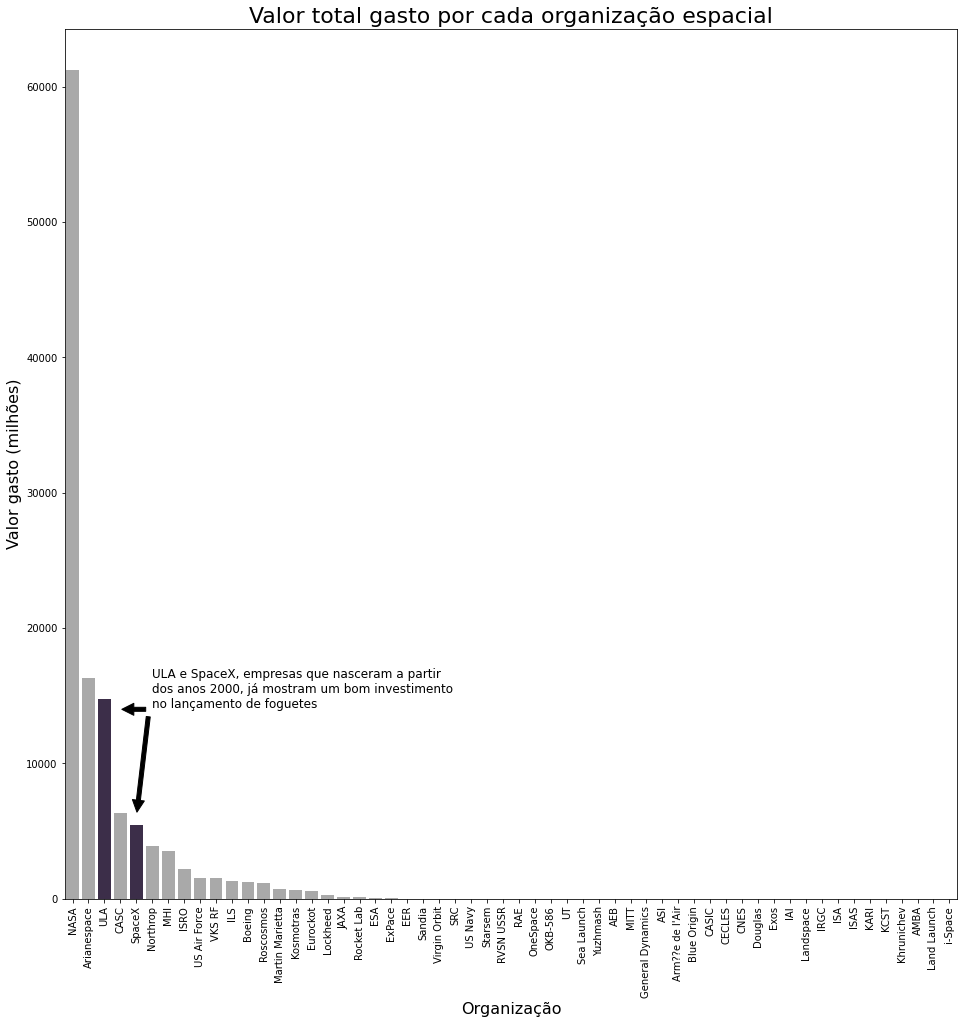

In [16]:
#plotando um gráfico
plt.figure(figsize=(16,16))
sns.barplot(x = 'Organisation', y = 'Price', data = df2, color = '#a9a9a9', order = df2.sort_values('Price', ascending = False).Organisation)
sns.barplot(x = 'Organisation', y = 'Price', data = df2[df2['Organisation'] == 'SpaceX'], color='#3c2a4d', order = df2.sort_values('Price', ascending = False).Organisation)
sns.barplot(x = 'Organisation', y = 'Price', data = df2[df2['Organisation'] == 'ULA'], color='#3c2a4d', order = df2.sort_values('Price', ascending = False).Organisation)
plt.xticks(rotation = 90)
plt.xlabel('Organização', fontsize = 16)
plt.ylabel('Valor gasto (milhões)', fontsize = 16)
plt.title('Valor total gasto por cada organização espacial', fontsize = 22)
plt.text(5, 14100, 'ULA e SpaceX, empresas que nasceram a partir\ndos anos 2000, já mostram um bom investimento \nno lançamento de foguetes', fontsize = 12)
plt.annotate(' ', horizontalalignment = 'right', verticalalignment = 'top', xytext = (5, 14000), xy = (3, 14000), arrowprops = dict(facecolor = 'black', shrink = 0.05))
plt.annotate(' ', horizontalalignment = 'right', verticalalignment = 'bottom', xytext = (5, 14000), xy = (4, 6000), arrowprops = dict(facecolor = 'black', shrink = 0.05))

In [17]:
#criando um dataframe com o número de lançamento de cada organização
df3 = df['Organisation'].value_counts()

In [18]:
#resetando os indexes
df3 = df3.reset_index()

In [19]:
#renomeando as colunas
df3.columns = ['Organisation', 'NumLaunch']

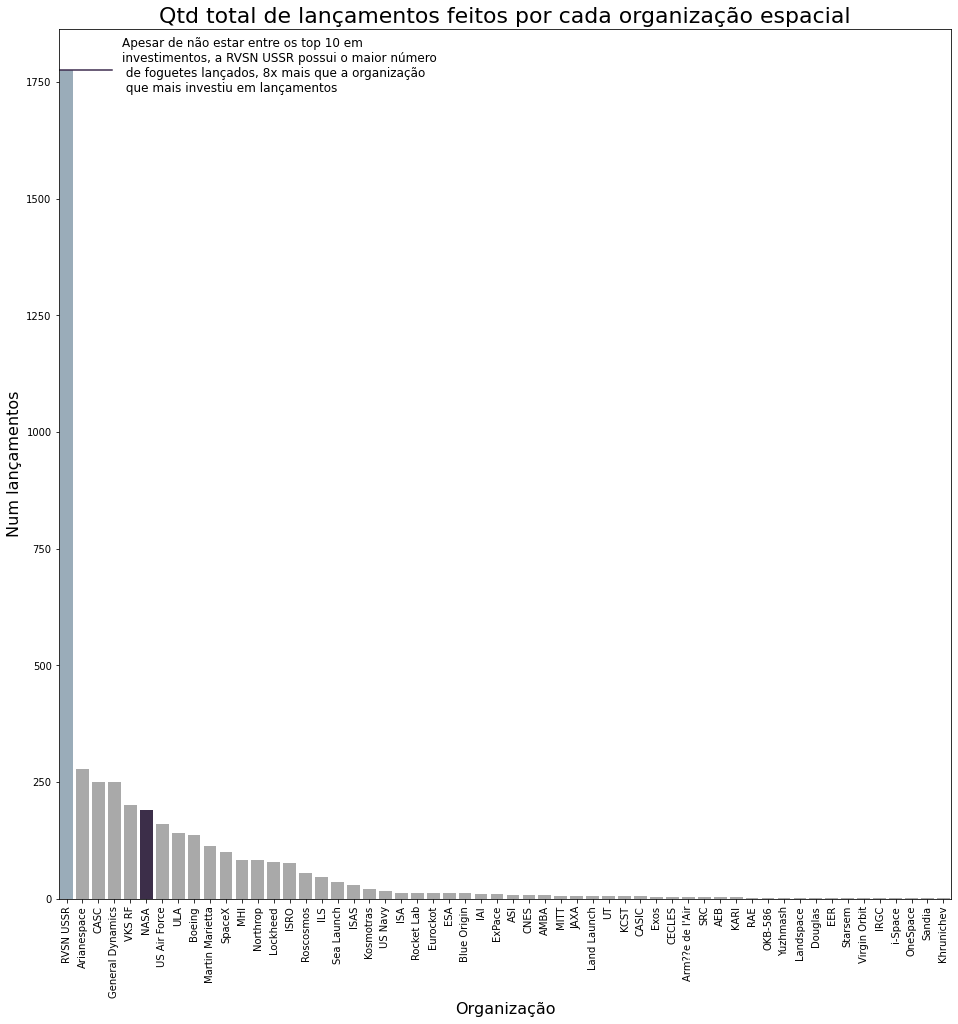

In [20]:
#plotando um gráfico
plt.figure(figsize=(16,16))
sns.barplot(x = 'Organisation', y = 'NumLaunch', data = df3, color = '#a9a9a9', order = df3.sort_values('NumLaunch', ascending = False).Organisation)
sns.barplot(x = 'Organisation', y = 'NumLaunch', data = df3[df3['Organisation'] == 'NASA'], color = '#3c2a4d', order = df3.sort_values('NumLaunch', ascending = False).Organisation)
sns.barplot(x = 'Organisation', y = 'NumLaunch', data = df3[df3['Organisation'] == 'RVSN USSR'], color = '#95adbe', order = df3.sort_values('NumLaunch', ascending = False).Organisation)
plt.xticks(rotation = 90)
plt.xlabel('Organização', fontsize = 16)
plt.ylabel('Num lançamentos', fontsize = 16)
plt.title('Qtd total de lançamentos feitos por cada organização espacial', fontsize = 22)
plt.text(3.5, 1730, 'Apesar de não estar entre os top 10 em \ninvestimentos, a RVSN USSR possui o maior número\n de foguetes lançados, 8x mais que a organização\n que mais investiu em lançamentos', fontsize = 12)
plt.axhline(y = 1775, xmin = 0, xmax = 0.06, color='#3c2a4d')

In [21]:
#verificando os números referente ao sucesso/falha nos lançamentos 
df['Mission_Status'].value_counts()

Success              3865
Failure               339
Partial Failure       101
Prelaunch Failure       4
Name: Mission_Status, dtype: int64

In [22]:
#armazenando a quantidade de casa status do lançamento por organização em diferentes variáveis 
df4 = df[df['Mission_Status'] == 'Success']['Organisation'].value_counts()
df4_1 = df[df['Mission_Status'] == 'Failure']['Organisation'].value_counts()
df4_2 = df[df['Mission_Status'] == 'Partial Failure']['Organisation'].value_counts()
df4_3 = df[df['Mission_Status'] == 'Prelaunch_Status']['Organisation'].value_counts()

In [23]:
#gerando um quarto df com os dados obtidos pelo filtro  
df4 = pd.DataFrame([df4, df4_1, df4_2, df4_3], index = ['Success', 'Failure', 'Partial_failure', 'Prelaunch_status'])

In [24]:
#girando o df
df4 = df4.transpose()
#resetando os indexes
df4.reset_index(inplace = True)
#renomeando as colunas
df4.rename(columns={'index':'Organisation'}, inplace = True)

In [25]:
#fundindo o dataframe df4 e df3 pela coluna 'Organisation'
df4 = df4.merge(df3, on = 'Organisation')

In [26]:
#calculando a % de falha e sucesso, armazenando os valores em uma nova coluna
df4['PercSuccess'] = df4['Success']/df4['NumLaunch'] * 100
df4['PercFailure'] = df4['Failure']/df4['NumLaunch'] * 100

In [27]:
#verificando o novo df
df4.head()

,Organisation,Success,Failure,Partial_failure,Prelaunch_status,NumLaunch,PercSuccess,PercFailure
0,RVSN USSR,1612.0,121.0,41.0,NaN,1775,90.816901,6.816901
1,Arianespace,269.0,7.0,3.0,NaN,279,96.415771,2.508961
2,CASC,231.0,14.0,6.0,NaN,251,92.031873,5.577689
3,General Dynamics,203.0,37.0,11.0,NaN,251,80.876494,14.741036
4,VKS RF,188.0,7.0,6.0,NaN,201,93.532338,3.482587


Text(33.6, 18, ' ')

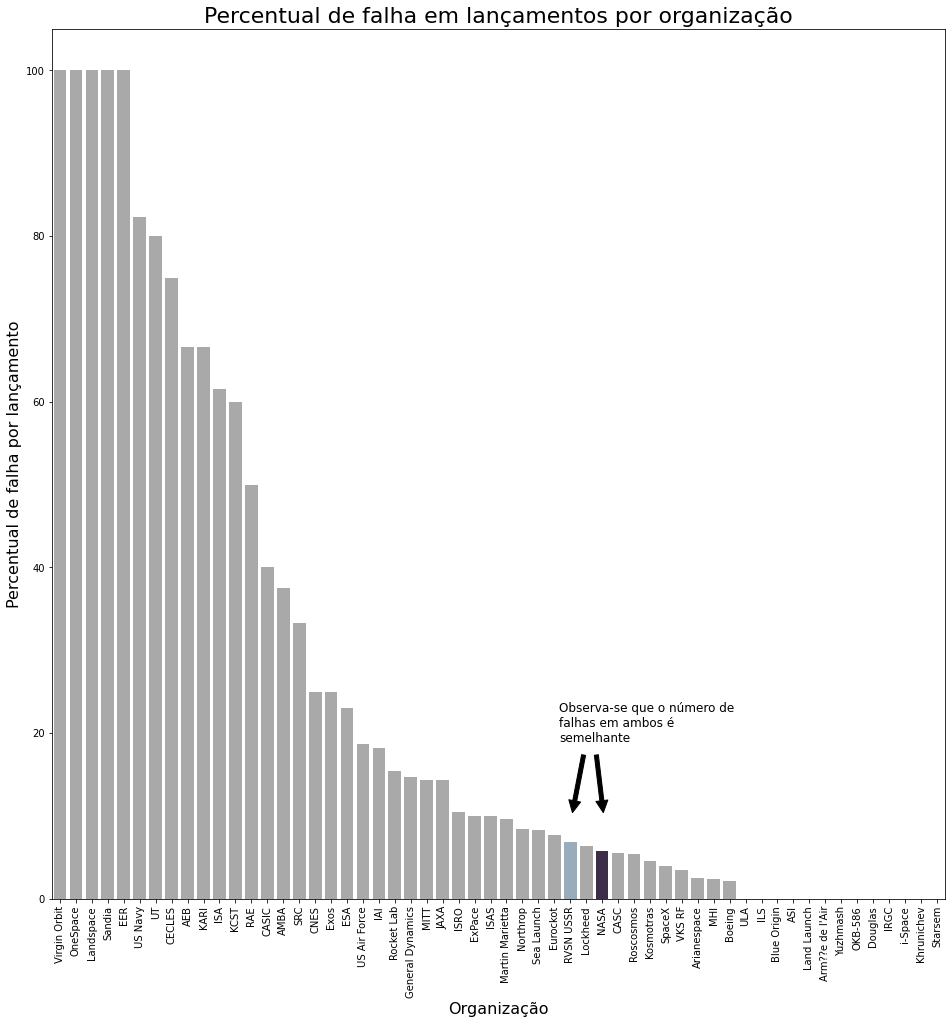

In [28]:
#plotando um gráfico
plt.figure(figsize=(16,16))
sns.barplot(x = 'Organisation', y = 'PercFailure', data = df4, color = '#a9a9a9', order = df4.sort_values('PercFailure', ascending = False).Organisation)
sns.barplot(x = 'Organisation', y = 'PercFailure', data = df4[df4['Organisation'] == 'NASA'], color = '#3c2a4d', order = df4.sort_values('PercFailure', ascending = False).Organisation)
sns.barplot(x = 'Organisation', y = 'PercFailure', data = df4[df4['Organisation'] == 'RVSN USSR'], color = '#95adbe', order = df4.sort_values('PercFailure', ascending = False).Organisation)
plt.xticks(rotation = 90)
plt.xlabel('Organização', fontsize = 16)
plt.ylabel('Percentual de falha por lançamento', fontsize = 16)
plt.title('Percentual de falha em lançamentos por organização', fontsize = 22)
plt.text(31.30, 19, 'Observa-se que o número de \nfalhas em ambos é \nsemelhante', fontsize = 12)
plt.annotate(' ', horizontalalignment = 'right', verticalalignment = 'bottom', xytext = (33.10, 18), xy = (32.10, 10), arrowprops = dict(facecolor = 'black', shrink = 0.05))
plt.annotate(' ', horizontalalignment = 'right', verticalalignment = 'bottom', xytext = (33.60, 18), xy = (34.10, 10), arrowprops = dict(facecolor = 'black', shrink = 0.05))

Text(24.1, 96, ' ')

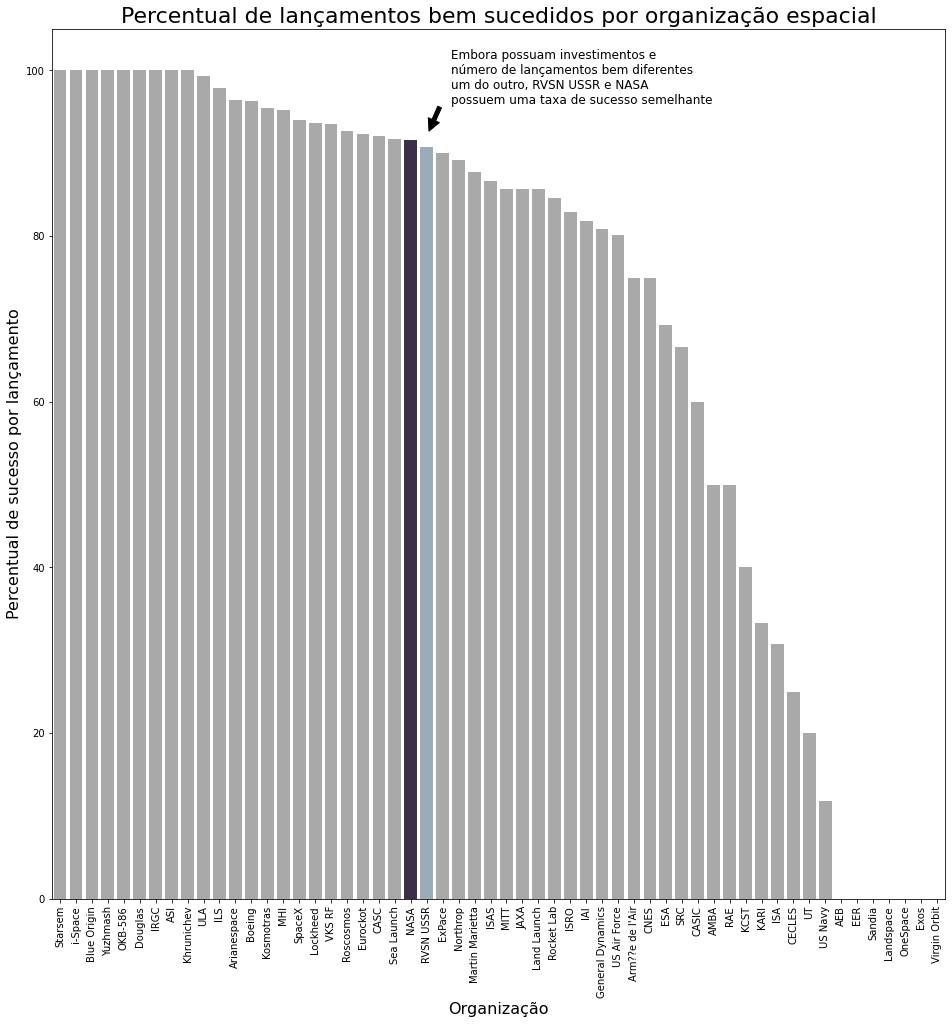

In [29]:
#plotando um gráfico
plt.figure(figsize=(16,16))
sns.barplot(x = 'Organisation', y = 'PercSuccess', data = df4, color = '#a9a9a9', order = df4.sort_values('PercSuccess', ascending = False).Organisation)
sns.barplot(x = 'Organisation', y = 'PercSuccess', data = df4[df4['Organisation'] == 'NASA'], color = '#3c2a4d', order = df4.sort_values('PercSuccess', ascending = False).Organisation)
sns.barplot(x = 'Organisation', y = 'PercSuccess', data = df4[df4['Organisation'] == 'RVSN USSR'], color = '#95adbe', order = df4.sort_values('PercSuccess', ascending = False).Organisation)
plt.xticks(rotation = 90)
plt.xlabel('Organização', fontsize = 16)
plt.ylabel('Percentual de sucesso por lançamento', fontsize = 16)
plt.title('Percentual de lançamentos bem sucedidos por organização espacial', fontsize = 22)
plt.text(24.5, 96, 'Embora possuam investimentos e \nnúmero de lançamentos bem diferentes \num do outro, RVSN USSR e NASA \npossuem uma taxa de sucesso semelhante', fontsize = 12)
plt.annotate(' ', horizontalalignment = 'right', verticalalignment = 'bottom', xytext = (24.10, 96), xy = (23.10, 92.50), arrowprops = dict(facecolor = 'black', shrink = 0.05))

In [30]:
#armazenando em uma variável cada ano e o número de lançamentos que ocorreram no mesmo
df_time = df.groupby(df['Date'].dt.year)['Organisation'].count()

In [31]:
#trabsformando a variável em um df
df_time = pd.DataFrame(df_time)

In [32]:
#resetando os indexes
df_time.reset_index(inplace = True)

In [33]:
#renomeando as colunas
df_time.columns = ['Date', 'NumLaunch']

In [34]:
#verificando o novo df
df_time.head()


,Date,NumLaunch
0,1957,3
1,1958,28
2,1959,20
3,1960,39
4,1961,52


Text(0.5, 1.0, 'Lançamentos de foguetes por ano')

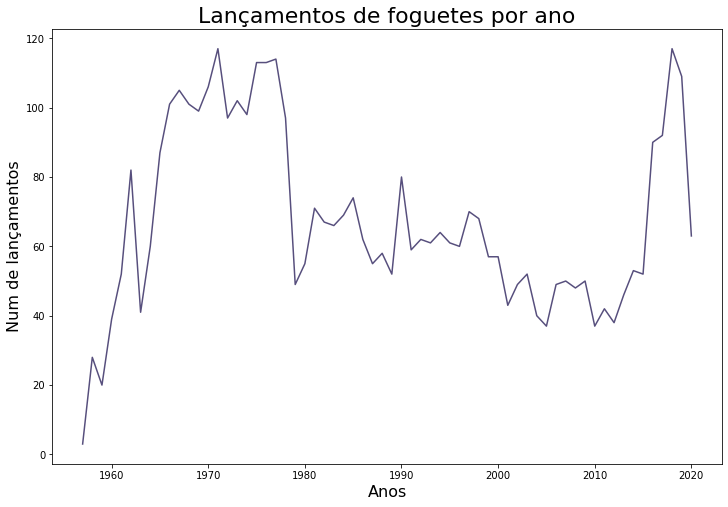

In [35]:
#plotando um gráfico
plt.figure(figsize=(12,8))
sns.lineplot(x = 'Date', y = 'NumLaunch', data = df_time, color = '#574f7d')
plt.xlabel('Anos', fontsize = 16)
plt.ylabel('Num de lançamentos', fontsize = 16)
plt.title('Lançamentos de foguetes por ano', fontsize = 22)

In [36]:
#criando o conteúdo da legenda 
blue_point = mlines.Line2D([], [], color='blue', marker='o', linestyle='None',
                          markersize=10, label='Inicio')
red_point = mlines.Line2D([], [], color='red', marker='o', linestyle='None',
                          markersize=10, label='Fim')

Text(0.5, 1.0, 'Lançamentos de foguetes por ano')

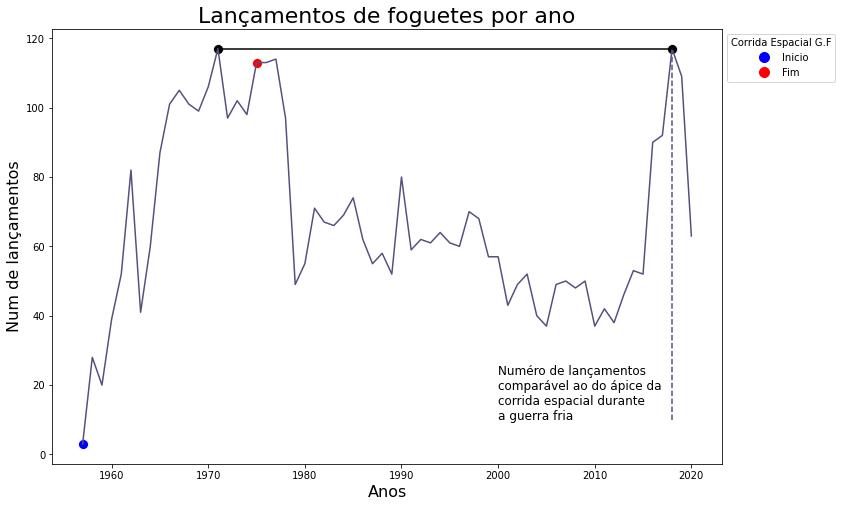

In [37]:
#plotando o gráfico
plt.figure(figsize=(12,8))
sns.lineplot(x = 'Date', y = 'NumLaunch', data = df_time, color = '#574f7d')
sns.scatterplot(x = 'Date', y = 'NumLaunch', data = df_time[(df_time['Date'] == 1971) | (df_time['Date'] == 2018)], s = 100, color = 'black')
sns.scatterplot(x = 'Date', y = 'NumLaunch', data = df_time[df_time['Date'] == 1975], s = 100, color = 'red')
sns.scatterplot(x = 'Date', y = 'NumLaunch', data = df_time[df_time['Date'] == 1957], s = 100, color = 'blue')
plt.axhline(y = 117, xmin = 0.25, xmax = 0.93, color='black')
plt.legend(handles=[blue_point, red_point], title = 'Corrida Espacial G.F', bbox_to_anchor = (1,1))
plt.axvline(2018, 0.10, 0.95, color = '#574f7d', linestyle = '--')
plt.text(2000, 10, 'Numéro de lançamentos\ncomparável ao do ápice da \ncorrida espacial durante \na guerra fria', fontsize = 12)
plt.xlabel('Anos', fontsize = 16)
plt.ylabel('Num de lançamentos', fontsize = 16)
plt.title('Lançamentos de foguetes por ano', fontsize = 22)